In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

In [8]:
base = pd.read_csv('AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [10]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
base

C:\Users\phlor\AppData\Local\Temp\ipykernel_12480\235159312.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [11]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [13]:
ts[1]

C:\Users\phlor\AppData\Local\Temp\ipykernel_12480\4108791374.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[1]


118

In [14]:
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [15]:
ts[datetime(1949,2,1)]

118

In [16]:
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [17]:
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [18]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [19]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [20]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

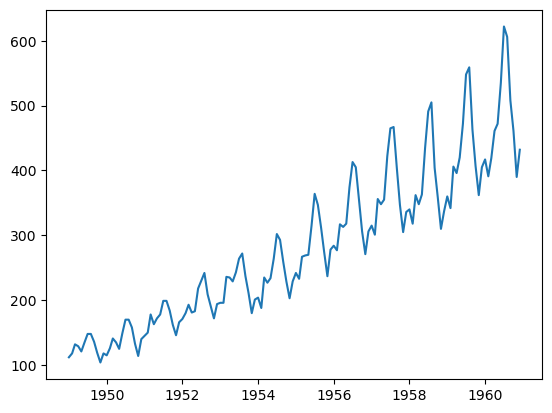

In [21]:
plt.plot(ts)

C:\Users\phlor\AppData\Local\Temp\ipykernel_12480\1953709870.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_ano = ts.resample('A').sum()


Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: YE-DEC, Name: #Passengers, dtype: int64

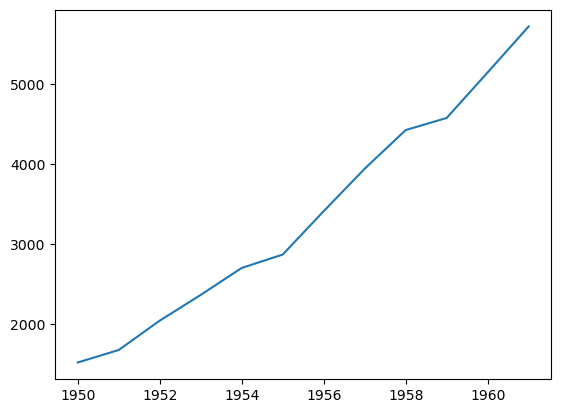

In [22]:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)
ts_ano

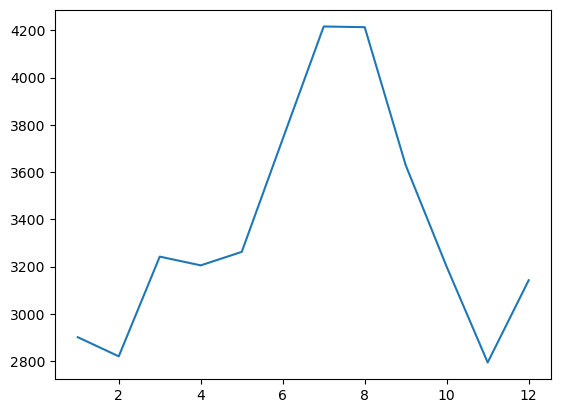

In [23]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

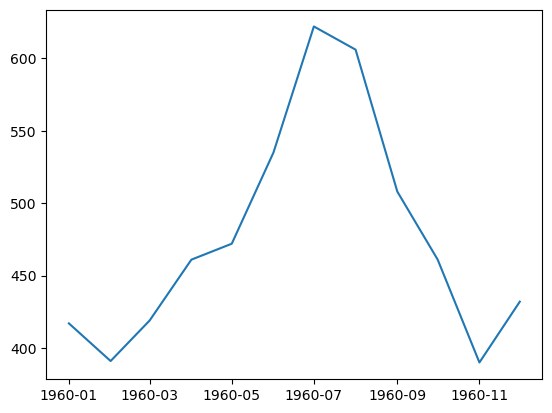

In [24]:
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)